<a href="https://colab.research.google.com/github/cfreeman22/Computer-Vision-Project/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load dataset and Summary

### Mount the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the libraries

In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 # this is an important module to get imported which may even cause issues while reading the data if not used
import seaborn as sns # for data visualization 
import tensorflow as tf
import keras
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend 
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam,SGD #optimiers for optimizing the model
from tensorflow.keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
# Importing all the required sub-modules from Keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

In [3]:
raw_data =pd.read_csv('/content/drive/My Drive/Labels.csv')

In [4]:
raw_data.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [5]:
raw_data.shape

(4750, 1)

In [6]:
raw_data.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
dtype: int64

In [7]:
raw_data.loc[1000]

Label    Shepherds Purse
Name: 1000, dtype: object

In [8]:
raw_data.loc[1500]

Label    Common Chickweed
Name: 1500, dtype: object

In [9]:
images =np.load('/content/drive/My Drive/images.npy')

In [10]:
# Class y variables.
y = raw_data["Label"]
# images X variables.
X = images

In [11]:
print('Total Number of images are :',len(images))
print('The shape of a sample image is :',images[0].shape)
 

Total Number of images are : 4750
The shape of a sample image is : (128, 128, 3)


##Takeaway 
- The label data has 4750 rows with 12 distinct species
- 

# Exploratory Data Analysis on the images

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


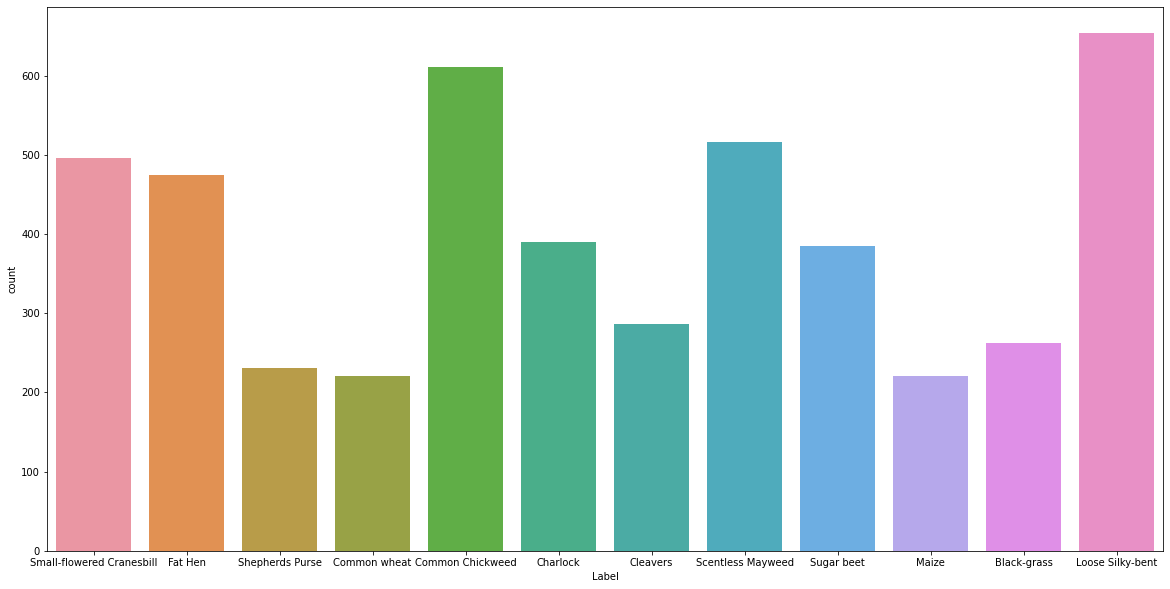

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(y)

In [13]:
categories =['Loose Silky-bent', 'Common Chickweed', 'Scentless Mayweed', 'Small-flowered Cranesbill', 'Fat Hen',
             'Charlock','Sugar beet', 'Cleavers', 'Black-grass','Shepherds Purse', 'Common wheat', 'Maize']


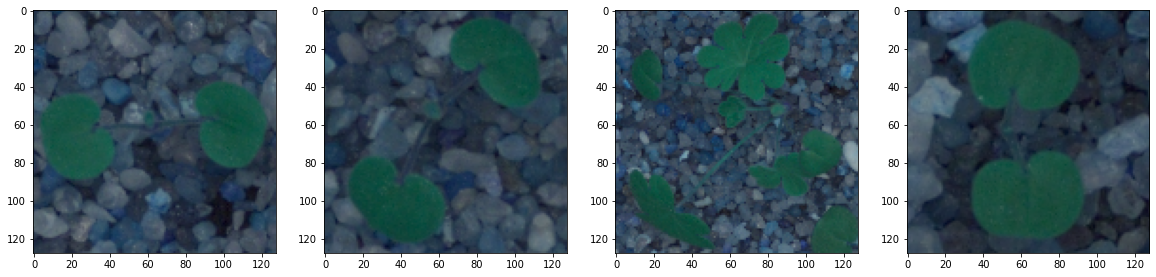

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(20,20))
axs[0].imshow(images[0])
axs[1].imshow(images[25])
axs[2].imshow(images[43])
axs[3].imshow(images[61])

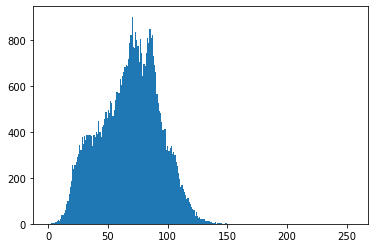

In [15]:
plt.hist(images[0].ravel(),256,[0,255])
plt.show()

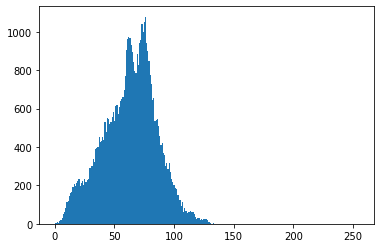

In [16]:
plt.hist(images[25].ravel(),256,[0,255])
plt.show()

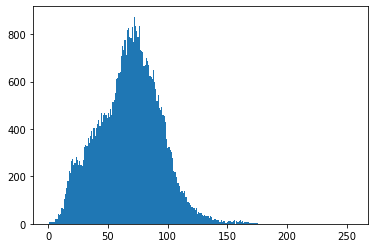

In [17]:
plt.hist(images[43].ravel(),256,[0,255])
plt.show()

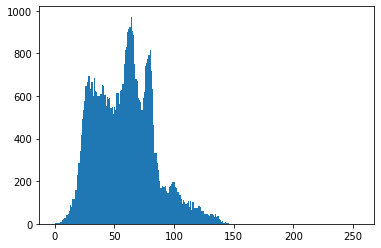

In [18]:
plt.hist(images[61].ravel(),256,[0,255])
plt.show()

## insights based on EDA
- The loose silky bent, Common Chickweed ,Small-flowered Cranesbill,and the Scentless Mayweed are the highest in terms of count
- the Maize is the lowest   
- The shape is of 2-D array is 128x128 pixels
- The intensities of the images are highly skewed towards left. That means, the images are darker.
- All the values of intensities in our images lie between the range 0-150

# Data Pre - Processing
## Applying gaussian blurring:

In [19]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(X):
    X[idx] = cv2.GaussianBlur(src=img, ksize=(5, 5), sigmaX=1)

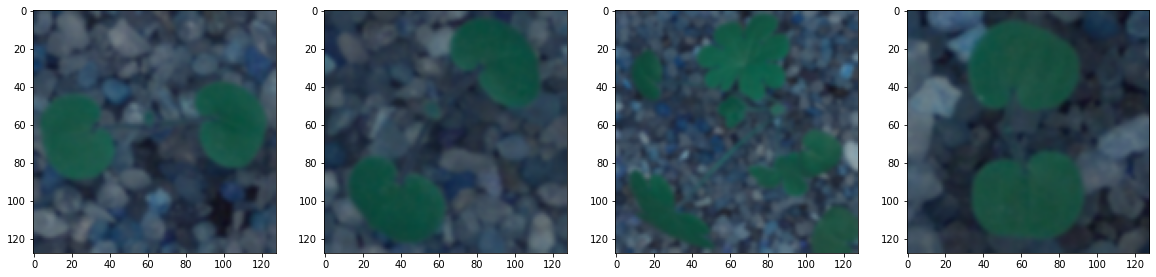

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(20,20))
axs[0].imshow(X[0])
axs[1].imshow(X[25])
axs[2].imshow(X[43])
axs[3].imshow(X[61])

# Make data compatible

## Split the dataset into training, testing, and validation set.

In [21]:
# Split the data into train/val/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

In [22]:
 # Print shape of the data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(3325, 128, 128, 3)
(3325,)
(712, 128, 128, 3)
(712,)
(713, 128, 128, 3)
(713,)


In [23]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255
X_test /= 255

In [24]:
from sklearn.preprocessing import LabelBinarizer
# Storing the LabelBinarizer function in lb variable
lb = LabelBinarizer() 
# Applying fit_transform on train target variable
y_train_e = lb.fit_transform(y_train)
# Applying only transform on test target variable
y_test_e = lb.transform(y_test)

In [25]:
from tensorflow.keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

# Model building
#  CNN

In [26]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of MNIST images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(128,128,3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(100, activation='relu'))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
# Fitting the model with 30 epochs and validation_split as 10%
history=model.fit(X_train, 
          y_train_e,  
          epochs=30, 
          batch_size=32,validation_split=0.10,callbacks=[es, mc])  

Epoch 1/30
94/94 [==============================] - ETA: 0s - loss: 2.4301 - accuracy: 0.1337
Epoch 1: val_accuracy improved from -inf to 0.10210, saving model to best_model.h5
94/94 [==============================] - 222s 2s/step - loss: 2.4301 - accuracy: 0.1337 - val_loss: 2.4614 - val_accuracy: 0.1021
Epoch 2/30
94/94 [==============================] - ETA: 0s - loss: 2.4222 - accuracy: 0.1327
Epoch 2: val_accuracy improved from 0.10210 to 0.13514, saving model to best_model.h5
94/94 [==============================] - 204s 2s/step - loss: 2.4222 - accuracy: 0.1327 - val_loss: 2.4429 - val_accuracy: 0.1351
Epoch 3/30
18/94 [====>.........................] - ETA: 2:39 - loss: 2.4344 - accuracy: 0.1215

### Plotting Accuracy vs Epoch Curve

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model Performance Evaluation

In [ ]:
model.evaluate(X_test,(y_test_e))

In [ ]:
# Test Prediction 
y_test_pred_ln = model.predict(X_test)
y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)
normal_y_test = np.argmax(y_test_e, axis=1)

Since we have converted the target variable into a NumPy array using labelbinarizer, now we are converting the target variable into its original form by using the numpy. argmax() function which returns indices of the max element of the array in a particular axis and this original form of target will be used in calculating the accuracy, and plotting the confusion matrix.

In [ ]:
# Test Accuracy 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score((normal_y_test), y_test_pred_classes_ln)

In [ ]:
cf_matrix = confusion_matrix(normal_y_test, y_test_pred_classes_ln)

# Confusion matrix normalized per category true value
cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)
plt.figure(figsize=(18,15))
sns.heatmap(cf_matrix_n1, xticklabels=categories, yticklabels=categories, annot=True)

## Model Performance Improvement

In [ ]:
# With data augmentation to prevent overfitting (accuracy 0.99286)

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

In [ ]:
X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

In [ ]:
# Loading VGG16 model 
model = VGG16(weights='imagenet')
# Summary of the whole model
model.summary()

In [ ]:
# Getting only the conv layers for transfer learning.
transfer_layer = model.get_layer('block5_pool')
vgg_model = Model(inputs=model.input, outputs=transfer_layer.output)

In [ ]:
vgg_model.summary()

In [ ]:
vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (150,150,3))
vgg_model.summary()

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
for layer in vgg_model.layers:
    print(layer.name, layer.trainable)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the model
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense input layer
new_model.add(Dense(32, activation='relu'))
# Adding dropout 
new_model.add(Dropout(0.2))
# Adding second input layer
new_model.add(Dense(32, activation='relu'))
# Adding output layer
new_model.add(Dense(3, activation='softmax'))

In [ ]:
# Compiling the model
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Summary of the model
new_model.summary()

In [ ]:
## Pulling a single large batch of random validation data for testing after each epoch
testX, testY = test_generator.next()

# Conclusion and key takeaways